<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r7_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r7/4-fft-normal-n-0-6-9-15-r7.csv?token=AKVFSODNHBBIHYGWB33B43C64IBL4')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r7/4-fft-malicious-n-0-6-9-15-m-1-11-r7.csv?token=AKVFSOGTHLON44QLOAV3KHS64IBMA')


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,11,0,4,1,1,4,3,9,6,6,23,7,2,1,1,1.0,8,139,1,139,139,0,8,3,27,1
1,11,0,4,1,1,4,3,9,6,6,23,7,3,1,1,1.0,8,213,1,213,213,0,12,3,27,0
2,12,0,1,1,1,4,3,9,11,11,23,7,5,1,1,1.0,9,212,2,213,424,0,20,3,27,0
3,15,0,1,1,1,4,3,10,15,15,23,7,6,2,2,1.0,12,211,3,213,633,0,24,3,30,0
4,15,0,1,1,1,4,3,9,15,15,23,7,4,2,2,1.0,12,138,2,139,276,0,16,3,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226732,3279135,4,0,3,1,4,3,9,23,7,22,6,60218,1,0,0.0,5,5,9,13,45,0,722616,9,81,0
226733,3279136,1,0,4,2,2,5,17,23,7,15,15,60218,2,0,0.0,6,4,10,13,40,0,963488,20,340,0
226734,3279137,1,0,4,3,2,5,17,23,7,15,15,60218,2,0,0.0,7,3,11,13,33,0,1445232,20,340,0
226735,3279138,1,0,4,4,2,5,17,23,7,15,15,60218,2,0,0.0,8,2,12,13,24,0,1926976,20,340,0


In [6]:
df.shape

(226737, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r7/4-fft-malicious-n-0-6-9-15-m-1-12-r7.csv?token=AKVFSOARFLPZJWJVCWBXXU264IBME')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r7/4-fft-malicious-n-0-6-9-15-m-1-7-r7.csv?token=AKVFSOF5EQMTX3P5FEFELP264IBMK')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r7/4-fft-malicious-n-0-6-9-15-m-11-12-r7.csv?token=AKVFSOALZBH75OCNCP4IFAC64IBMO')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r7/4-fft-malicious-n-0-6-9-15-m-7-11-r7.csv?token=AKVFSOFUPS2W5NLNPBCEI6C64IBMU')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r7/4-fft-malicious-n-0-6-9-15-m-7-12-r7.csv?token=AKVFSOBFSCGUOWEKU45GQJC64IBMY')

In [8]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(127208, 26)
(178468, 26)
(137052, 26)
(188046, 26)
(177518, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.558436,-0.342316,-0.052960,0.082150,0.438080,0.471998,-0.054449,0.162880,-0.431095,-0.621553,-0.490348,-0.049668,0.024724,-0.018281,-0.014940,0.149483,-0.141750,0.061075,0.368985,0.031801
inport,-0.558436,1.000000,0.127356,-0.044332,0.068765,-0.361227,-0.454318,-0.000430,0.318231,0.702846,0.813596,0.517551,-0.027178,-0.115186,-0.104334,-0.087146,0.430420,0.032663,-0.186259,-0.401752,-0.007593
cache_coherence_type,-0.342316,0.127356,1.000000,0.227971,-0.353620,-0.311007,-0.325404,0.041721,-0.194868,0.023895,0.142488,-0.040290,0.036005,-0.013615,0.016409,0.011579,-0.157065,0.289955,0.620734,0.016133,-0.002478
flit_id,-0.052960,-0.044332,0.227971,1.000000,0.035186,0.186931,0.156187,0.008818,-0.034779,-0.038907,-0.033135,0.314894,-0.017799,0.026201,0.006158,0.005026,-0.099763,0.632832,0.354202,0.261314,0.001047
flit_type,0.082150,0.068765,-0.353620,0.035186,1.000000,-0.289960,-0.242271,-0.013678,0.053948,0.060351,0.051398,0.362493,-0.022497,0.009265,-0.009697,-0.006648,0.154748,0.158058,-0.549425,-0.405340,-0.001624
vnet,0.438080,-0.361227,-0.311007,0.186931,-0.289960,1.000000,0.972940,-0.033333,0.217415,-0.308033,-0.548406,-0.534251,-0.031919,0.050373,0.013524,0.013179,-0.102116,-0.070780,0.552088,0.933757,-0.020957
vc,0.471998,-0.454318,-0.325404,0.156187,-0.242271,0.972940,1.000000,-0.025818,0.135105,-0.404941,-0.630180,-0.563101,-0.017815,0.072339,0.039959,0.034758,-0.164051,-0.076777,0.517134,0.935704,-0.022029
traversal_id,-0.054449,-0.000430,0.041721,0.008818,-0.013678,-0.033333,-0.025818,1.000000,-0.037583,-0.008507,0.013057,0.027450,0.080478,0.081406,0.118639,0.037240,-0.055707,0.562931,0.009104,-0.016196,-0.295193
hop_count,0.162880,0.318231,-0.194868,-0.034779,0.053948,0.217415,0.135105,-0.037583,1.000000,0.667192,0.219850,0.167411,-0.098368,-0.095504,-0.142082,-0.115570,0.385772,-0.089896,0.008396,0.108042,0.020621
current_hop,-0.431095,0.702846,0.023895,-0.038907,0.060351,-0.308033,-0.404941,-0.008507,0.667192,1.000000,0.774401,0.612553,-0.045471,-0.121186,-0.122138,-0.101016,0.366823,0.000868,-0.233143,-0.382631,-0.009358


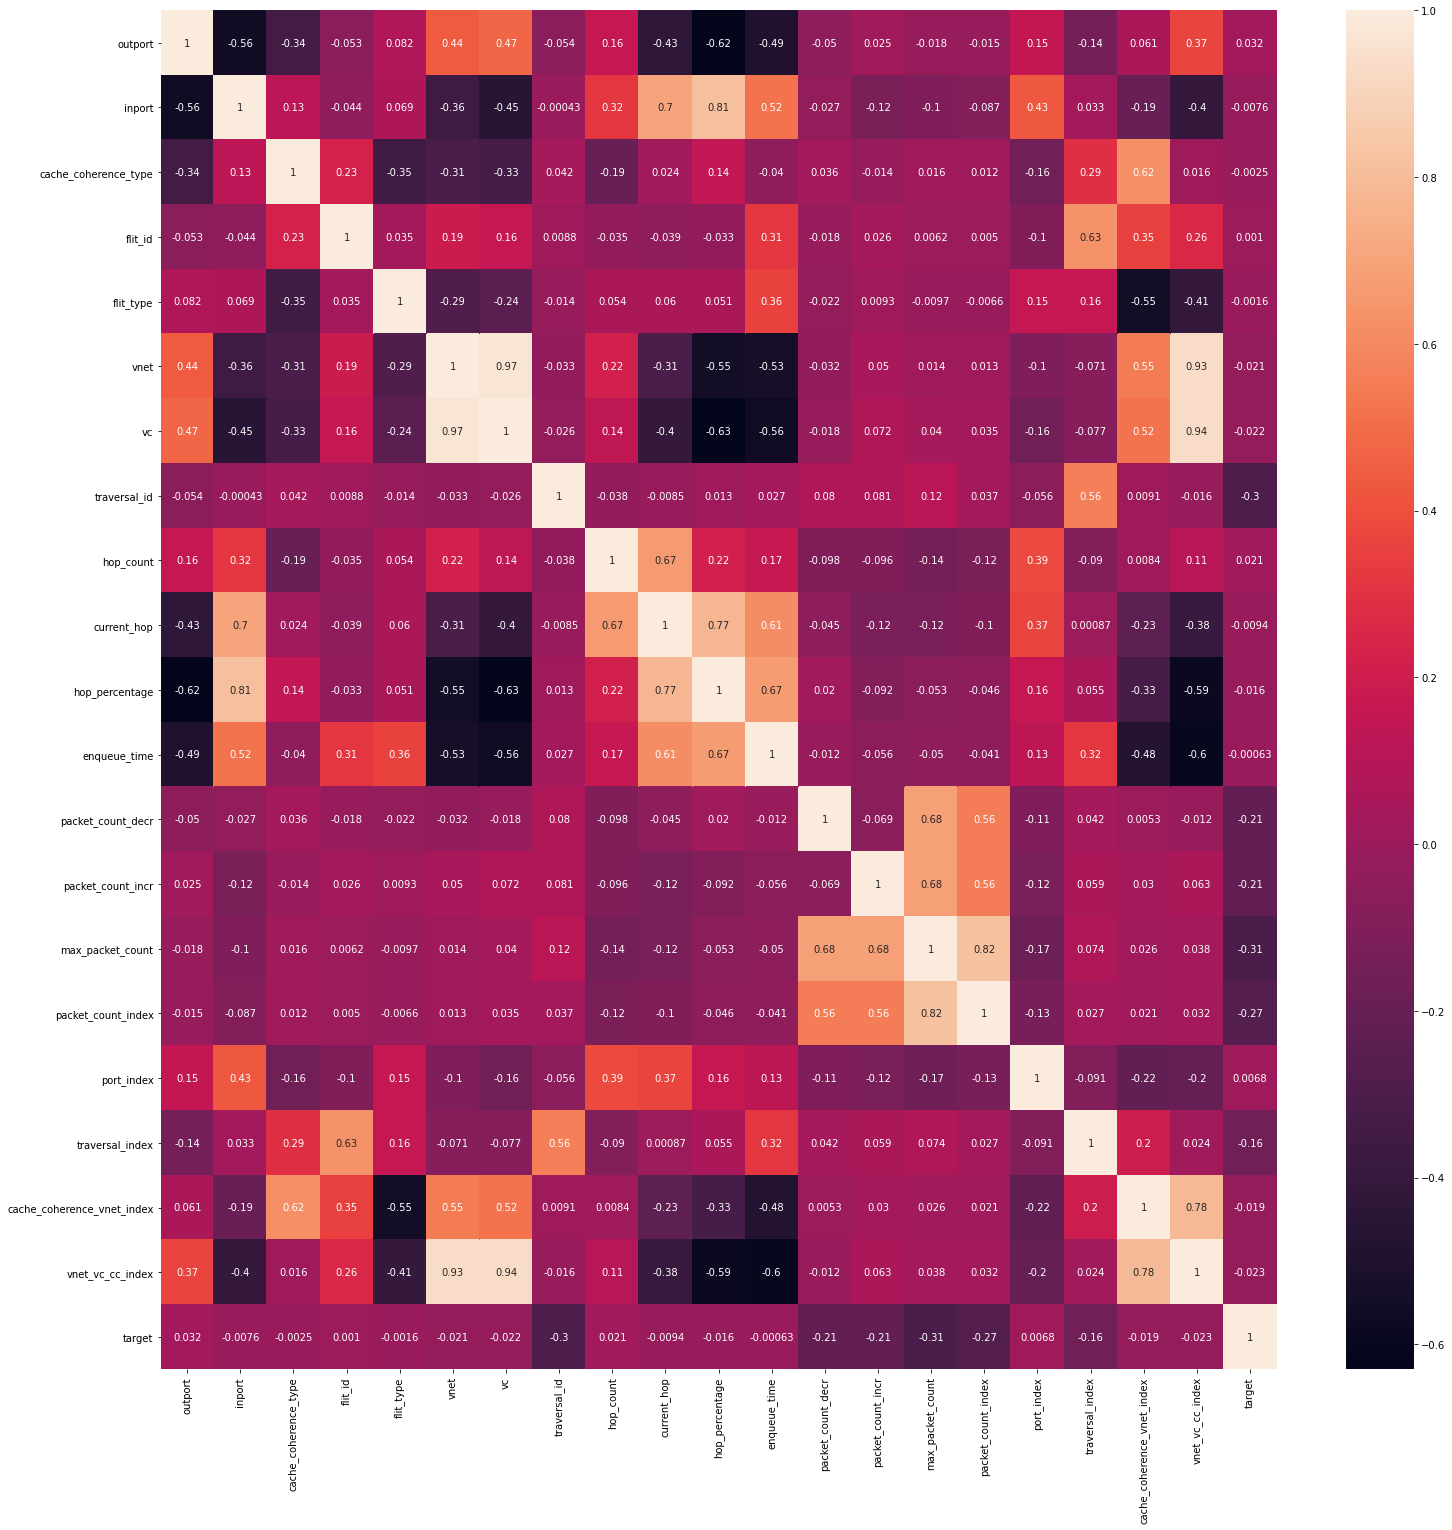

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

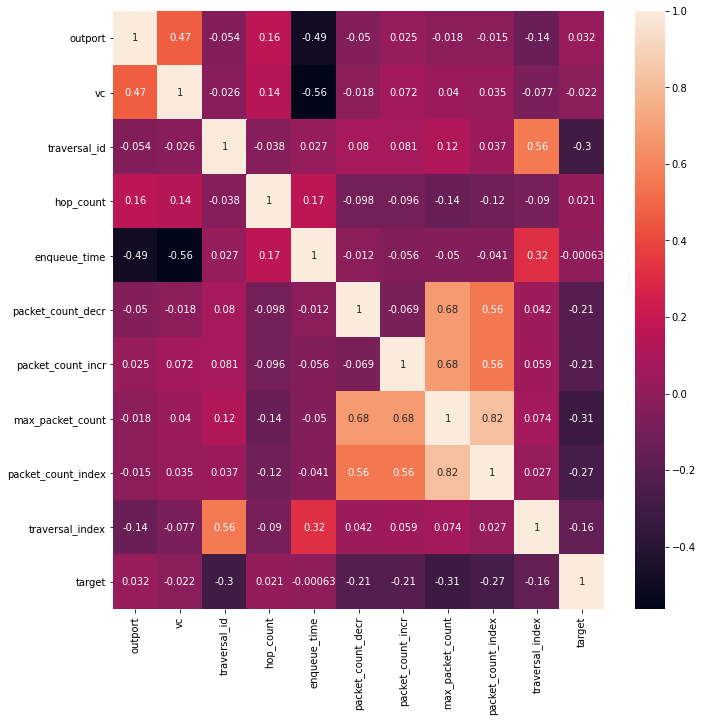

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

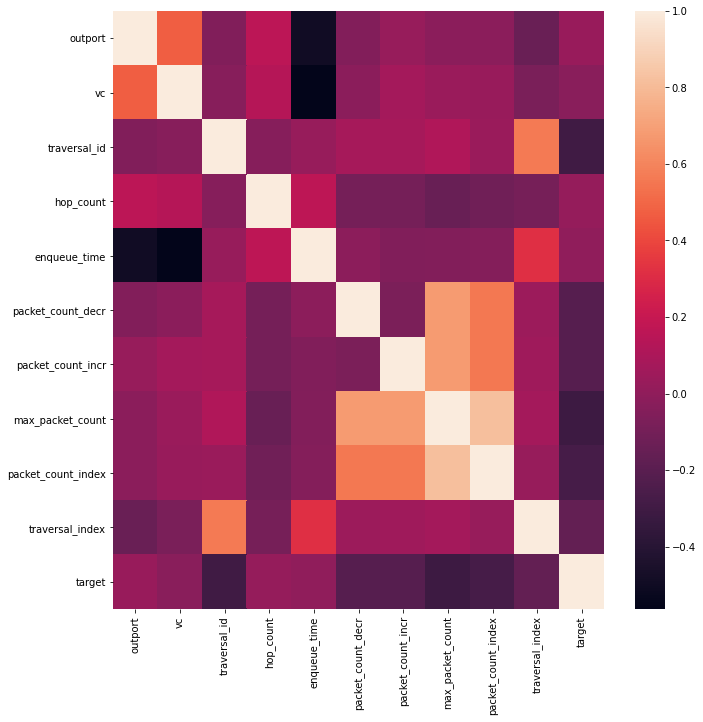

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.00,0.000000,0.000017,0.166667,0.058824,0.414414,0.000000,0.414414,0.004919,7.380719e-07
1,0.00,0.000000,0.000033,0.166667,0.058824,0.636637,0.000000,0.636637,0.007557,1.476144e-06
2,0.00,0.000000,0.000066,0.166667,0.073529,0.633634,0.003003,0.636637,0.015078,2.952288e-06
3,0.00,0.090909,0.000083,0.333333,0.117647,0.630631,0.006006,0.636637,0.022527,3.690360e-06
4,0.00,0.000000,0.000050,0.333333,0.117647,0.411411,0.003003,0.414414,0.009802,2.214216e-06
...,...,...,...,...,...,...,...,...,...,...
226732,1.00,0.000000,1.000000,0.166667,0.014706,0.012012,0.024024,0.036036,0.001568,1.333349e-01
226733,0.25,0.727273,1.000000,0.333333,0.029412,0.009009,0.027027,0.036036,0.001390,1.777801e-01
226734,0.25,0.727273,1.000000,0.333333,0.044118,0.006006,0.030030,0.036036,0.001141,2.666706e-01
226735,0.25,0.727273,1.000000,0.333333,0.058824,0.003003,0.033033,0.036036,0.000820,3.555610e-01


In [20]:
train_X[train_X.duplicated()].shape

(0, 10)

In [21]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.00,0.000000,0.000033,0.166667,0.048780,0.685811,0.000000,0.685811,0.009144,1.475433e-06
1,0.00,0.000000,0.000083,0.333333,0.097561,0.682432,0.003378,0.685811,0.018243,3.688583e-06
2,0.00,0.000000,0.000017,0.500000,0.146341,0.679054,0.006757,0.685811,0.027252,7.377166e-07
3,0.00,0.090909,0.000050,0.500000,0.158537,0.675676,0.010135,0.685811,0.036171,2.213150e-06
4,0.00,0.090909,0.000000,0.666667,0.195122,0.672297,0.013514,0.685811,0.045000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
127203,0.00,0.000000,0.999983,0.166667,0.390244,0.013514,0.111486,0.125000,0.007613,1.000000e+00
127204,0.00,0.090909,1.000000,0.166667,0.390244,0.010135,0.114865,0.125000,0.006261,8.888969e-02
127205,0.25,0.181818,0.999983,0.500000,0.060976,0.006757,0.118243,0.125000,0.004820,3.111106e-01
127206,0.25,0.727273,1.000000,0.333333,0.000000,0.003378,0.121622,0.125000,0.003288,4.444448e-02


In [22]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [24]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [25]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [27]:
train_Y = df['target']
train_Y.value_counts()

0    137778
1     88959
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  2275.691335
7    max_packet_count  1664.385126
8  packet_count_index  1432.678810
5   packet_count_decr   844.830546
6   packet_count_incr   819.642282
9     traversal_index   741.458264
0             outport    67.417809
1                  vc    34.138454
3           hop_count     9.085158
4        enqueue_time     0.024384


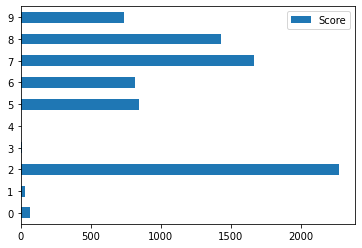

In [30]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [35]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.27203728449835
Test Prediction Score 97.69191703196836


In [36]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 82.78410162882838
Test Prediction Score 85.28643790483447
Test Prediction Score 85.19977818638182
Test Prediction Score 84.48677451261926
Test Prediction Score 83.9644430423957


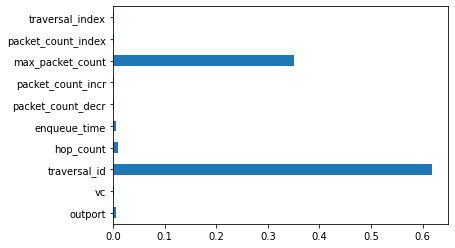

In [37]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

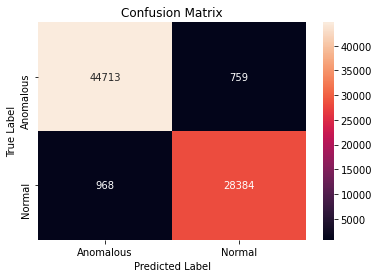

In [38]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     45472
           1       0.97      0.97      0.97     29352

    accuracy                           0.98     74824
   macro avg       0.98      0.98      0.98     74824
weighted avg       0.98      0.98      0.98     74824



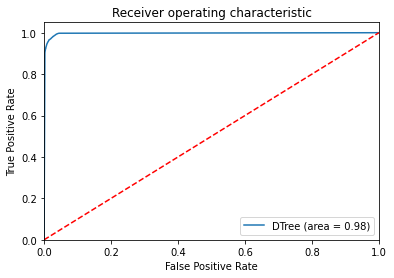

In [40]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [42]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r7l-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [45]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.88506361595209


In [46]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 84.07018426514055
Test Prediction Score 86.41997444920098
Test Prediction Score 86.75466246388233
Test Prediction Score 86.68198206821735
Test Prediction Score 84.64043082954969


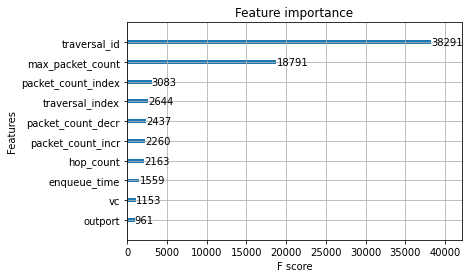

In [47]:
plot_importance(xgbc)
plt.show()

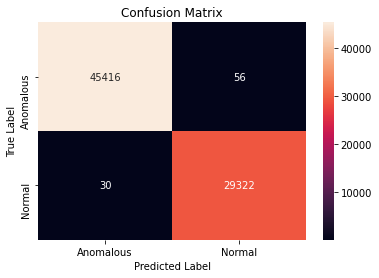

In [48]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45472
           1       1.00      1.00      1.00     29352

    accuracy                           1.00     74824
   macro avg       1.00      1.00      1.00     74824
weighted avg       1.00      1.00      1.00     74824



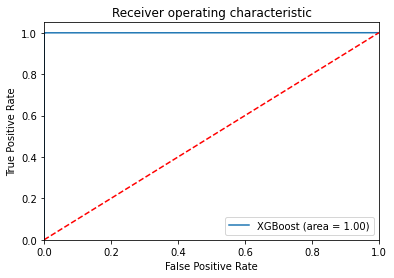

In [50]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()